[*********************100%%**********************]  8 of 8 completed


Portfolio Return: 18.04%
Portfolio Standard Deviation: 27.97%
Sharpe Ratio: 0.50
Portfolio with the maximum Sharpe ratio:
Return              0.331037
Volatility          0.311543
Sharpe Ratio        0.928721
PETR4.SA Weight     0.402032
ITUB4.SA Weight     0.009355
VALE3.SA Weight     0.030355
ABEV3.SA Weight     0.057551
WEGE3.SA Weight     0.415629
BPAC11.SA Weight    0.020729
BBAS3.SA Weight     0.058024
BBDC3.SA Weight     0.006325
Name: 897, dtype: float64

Portfolio with the minimum volatility:
Return              0.148820
Volatility          0.245736
Sharpe Ratio        0.435915
PETR4.SA Weight     0.021110
ITUB4.SA Weight     0.132021
VALE3.SA Weight     0.245174
ABEV3.SA Weight     0.350186
WEGE3.SA Weight     0.195806
BPAC11.SA Weight    0.033193
BBAS3.SA Weight     0.010108
BBDC3.SA Weight     0.012402
Name: 49353, dtype: float64


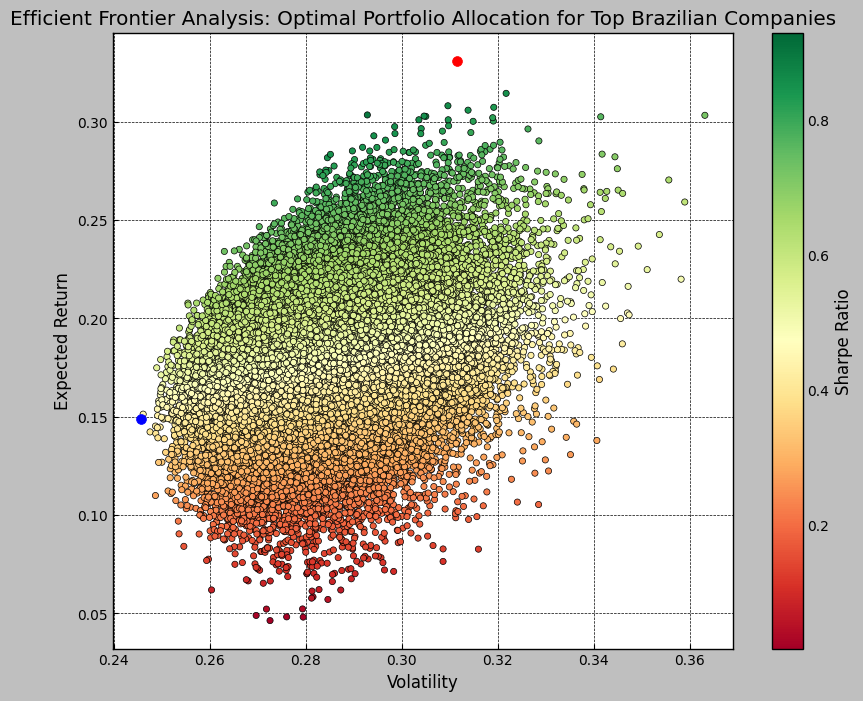

In [10]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
import warnings

warnings.filterwarnings('ignore')
cf.go_offline()

#define the tickers and download the adjusted close prices
tickers = ['PETR4.SA', 'ITUB4.SA', 'VALE3.SA', 'ABEV3.SA', 'WEGE3.SA', 'BPAC11.SA', 'BBAS3.SA', 'BBDC3.SA']
data = yf.download(tickers, period='5y')['Adj Close']

#normalizing the data
df_normalized = (data / data.iloc[0]) * 100

#calculate the portfolio value
weights = np.array([1/len(tickers)] * len(tickers))
portfolio_values = (df_normalized * weights).sum(axis=1)

#add portfolio values to the DataFrame for plotting
df_normalized['PORTFOLIO'] = portfolio_values

#plot the normalized growth graph with the portfolio consolidated line
df_normalized.iplot(kind='scatter',
                    yTitle='Adjusted Close',
                    title='Normalized Growth of Brazilian Stocks Over 5 Years',
                    theme='henanigans'
                    )

#calculate daily returns
daily_returns = data.pct_change().dropna()
portfolio_daily_returns = (daily_returns * weights).sum(axis=1)

#add portfolio daily returns to the DataFrame for plotting
daily_returns['PORTFOLIO'] = portfolio_daily_returns

#plot the daily returns graph with the portfolio consolidated line
daily_returns.iplot(title='Daily Return Volatility of Major Brazilian Stocks',
                    theme='henanigans'
                    )

#annual returns
annual_returns = daily_returns[tickers].mean() * 252
annual_returns.iplot(kind='bar',
                     barmode='stack',
                     title='Annualized Returns of Top Brazilian Stocks: A 5-Year Perspective',
                     theme='henanigans',
                     bargap=0.
                     )

#covariance matrix
cov_daily = daily_returns[tickers].cov()
cov_annual = cov_daily * 252

#calculate the portfolio return and volatility with equal weights
portfolio_return = np.dot(weights, annual_returns)
portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))

#calculate the Sharpe ratio
risk_free_rate = 0.0417
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev

print(f"Portfolio Return: {portfolio_return * 100:.2f}%")
print(f"Portfolio Standard Deviation: {portfolio_std_dev * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

#empty lists for random portfolios
portfolio_return = []
weights_list = []
portfolio_volatility = []
sharpe_ratio = []

num_tickers = len(tickers)
num_portfolios = 50000

np.random.seed(101)

for each_portfolio in range(num_portfolios):
    #assign random weights to each stock in the portfolio
    weight = np.random.random(num_tickers)
    weight /= np.sum(weight)
    #calculate the portfolio return
    returns = np.dot(weight, annual_returns)
    #calculate the portfolio volatility
    volatility = np.sqrt(np.dot(weight.T, np.dot(cov_annual, weight)))
    #calculate the Sharpe ratio
    sharpe = (returns - risk_free_rate) / volatility
    #append each portfolio to the previously created lists
    sharpe_ratio.append(sharpe)
    portfolio_return.append(returns)
    portfolio_volatility.append(volatility)
    weights_list.append(weight)

portfolio = {
    'Return': portfolio_return,
    'Volatility': portfolio_volatility,
    'Sharpe Ratio': sharpe_ratio
}

for count, ticker in enumerate(tickers):
    portfolio[ticker + ' Weight'] = [weight[count] for weight in weights_list]

#transform the dictionary into a DataFrame
df_portfolios = pd.DataFrame(portfolio)

#name the columns of the new DataFrame
columns = ['Return', 'Volatility', 'Sharpe Ratio'] + [ticker + ' Weight' for ticker in tickers]
df_portfolios = df_portfolios[columns]

#identify the portfolio with the maximum Sharpe ratio and the minimum volatility
max_sharpe_port = df_portfolios.loc[df_portfolios['Sharpe Ratio'].idxmax()]
min_vol_port = df_portfolios.loc[df_portfolios['Volatility'].idxmin()]

print("Portfolio with the maximum Sharpe ratio:")
print(max_sharpe_port)

print("\nPortfolio with the minimum volatility:")
print(min_vol_port)

#plot the efficient frontier, the max Sharpe ratio & min Volatility values with a scatter plot
plt.style.use('grayscale')
df_portfolios.plot.scatter(x='Volatility',
                           y='Return',
                           c='Sharpe Ratio',
                           cmap='RdYlGn',
                           edgecolors='black',
                           figsize=(10, 8),
                           grid=True
                           )
plt.scatter(max_sharpe_port['Volatility'],
            max_sharpe_port['Return'],
            color='red',
            marker='.',
            s=200
            )
plt.scatter(min_vol_port['Volatility'],
            min_vol_port['Return'],
            color='blue',
            marker='.',
            s=200
            )
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier Analysis: Optimal Portfolio Allocation for Top Brazilian Companies')
plt.show()

